In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [343]:
# !pip install neattext

In [344]:
import neattext.functions as ntf 
# this library is use for cleaning text 

In [345]:
df1 = pd.read_csv("./Dataset/training.csv")
df_test = pd.read_csv("./Dataset/test.csv")
df_validation = pd.read_csv("./Dataset/validation.csv")

In [346]:
emotion_classes = {
    0 : 'sadness',
    1 : 'joy',
    2 : 'love',
    3 : 'anger',
    4 : 'fear',
    5 : 'confused'
}

In [347]:
emotion_classes_str = {
    'sadness' : 0,
    'joy' : 1,
    'love' : 2,
    'anger' : 3,
    'fear' : 4,
    'confused' : 5
}

# Data Exploration

In [348]:
df1.shape # this is used for model trainning

(16000, 2)

In [349]:
df_test.shape # this is used for testing out model

(2000, 2)

In [350]:
df_validation.shape # this is used for hyper-parameter testing

(2000, 2)

In [351]:
df1.head() # so data frame has 2 columns one is text means our X and one is prediction means our Y

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [352]:
df1.label.unique()

array([0, 3, 2, 5, 4, 1], dtype=int64)

In [353]:
np.array(df1[df1.label == 5].head(3))

array([['ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
        5],
       ['i have seen heard and read over the past couple of days i am left feeling impressed by more than a few companies',
        5],
       ['i keep feeling pleasantly surprised at his supportiveness and also his ease in new situations',
        5]], dtype=object)

In [354]:
# here i notice that there isn't any mention about label 5 in Dataset so i will take it as confused

In [355]:
# check whethere there is any "NA" values or not 
df1.isna().sum()

text     0
label    0
dtype: int64

In [356]:
df_test.isna().sum()

text     0
label    0
dtype: int64

In [357]:
df_validation.isna().sum()

text     0
label    0
dtype: int64

In [358]:
num_values1 = dict(df1['label'].value_counts())
num_values2 = dict(df_test['label'].value_counts())
num_values3 = dict(df_validation['label'].value_counts())

In [359]:
X1 = list(map(lambda x : emotion_classes[x] ,np.sort(df1['label'].unique())))
Y1 = list(map(lambda x : num_values1[x], np.sort(df1['label'].unique())))
print(X1,Y1)

['sadness', 'joy', 'love', 'anger', 'fear', 'confused'] [4666, 5362, 1304, 2159, 1937, 572]


<BarContainer object of 6 artists>

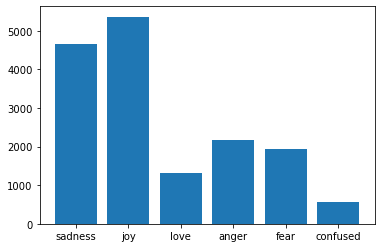

In [360]:
plt.bar(X1,Y1,width=0.8)

In [361]:
X2 = list(map(lambda x : emotion_classes[x] ,np.sort(df_test['label'].unique())))
Y2 = list(map(lambda x : num_values2[x], np.sort(df_test['label'].unique())))
print(X2,Y2)

['sadness', 'joy', 'love', 'anger', 'fear', 'confused'] [581, 695, 159, 275, 224, 66]


<BarContainer object of 6 artists>

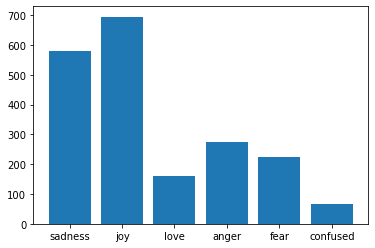

In [362]:
plt.bar(X2,Y2,width=0.8)

In [363]:
X3 = list(map(lambda x : emotion_classes[x] ,np.sort(df_validation['label'].unique())))
Y3 = list(map(lambda x : num_values3[x], np.sort(df_validation['label'].unique())))
print(X3,Y3)

['sadness', 'joy', 'love', 'anger', 'fear', 'confused'] [550, 704, 178, 275, 212, 81]


<BarContainer object of 6 artists>

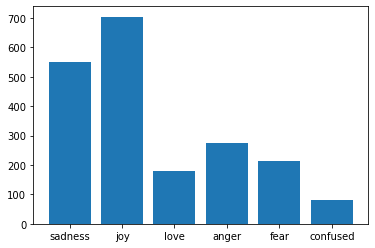

In [364]:
plt.bar(X3,Y3,width=0.8)

In [365]:
# so the ratio of emotions is same in all datasets

In [366]:
# sentiment anaylisis
# step 1 : tokenisation ( divide sentense into words )
# step 2 : cleaning the data ( remove spacial character )
# step 3 : removing stop words
# step 4 : classfication
# step 5 : score calculation
# Link : https://www.youtube.com/watch?v=O_B7XLfx0ic

In [367]:
# !pip install -U textblob

In [368]:
from textblob import TextBlob

In [369]:
def get_sentiments(text : str) -> str :
    
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    
    if sentiment > 0 : 
        return "positive"
    elif sentiment < 0 :
        return "negative"
    
    return "neutral"

In [370]:
get_sentiments("The movie was not great!")

'negative'

In [371]:
get_sentiments("the movie was great")

'positive'

In [372]:
df1['sentiment'] = df1['text'].apply(get_sentiments)
df1.head()

,text,label,sentiment
0,i didnt feel humiliated,0,neutral
1,i can go from feeling so hopeless to so damned...,0,neutral
2,im grabbing a minute to post i feel greedy wrong,3,negative
3,i am ever feeling nostalgic about the fireplac...,2,negative
4,i am feeling grouchy,3,neutral


In [373]:
for l in range(6) :
    temp_df = df1[df1.label == l]
    print(f"For {emotion_classes[l]} : ",dict(temp_df.groupby(by="sentiment")['sentiment'].agg('count')),sep="")

For sadness : {'negative': 2205, 'neutral': 1165, 'positive': 1296}
For joy : {'negative': 589, 'neutral': 776, 'positive': 3997}
For love : {'negative': 244, 'neutral': 179, 'positive': 881}
For anger : {'negative': 1047, 'neutral': 545, 'positive': 567}
For fear : {'negative': 871, 'neutral': 452, 'positive': 614}
For confused : {'negative': 233, 'neutral': 60, 'positive': 279}


<AxesSubplot:xlabel='label,sentiment'>

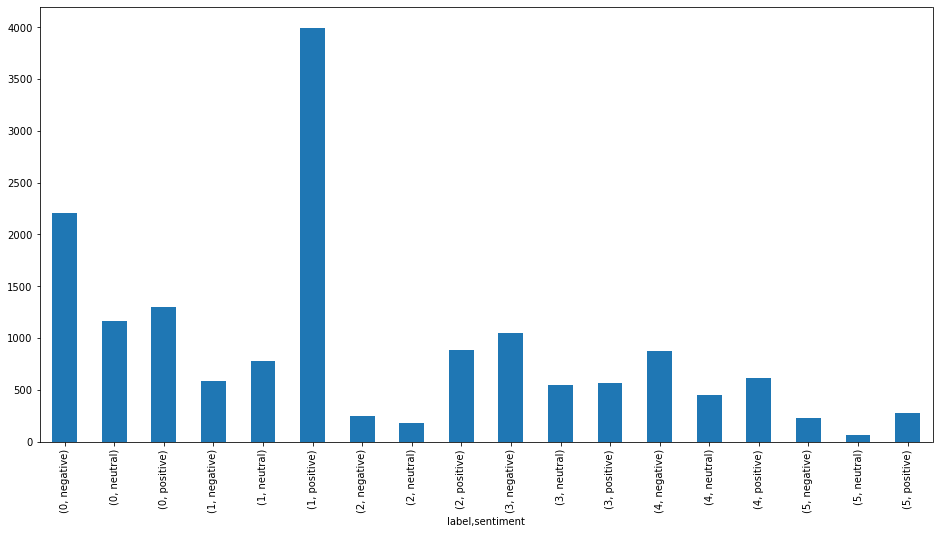

In [374]:
plt.figure(figsize=(16,8))
df1.groupby(by=['label','sentiment']).size().plot(kind='bar')

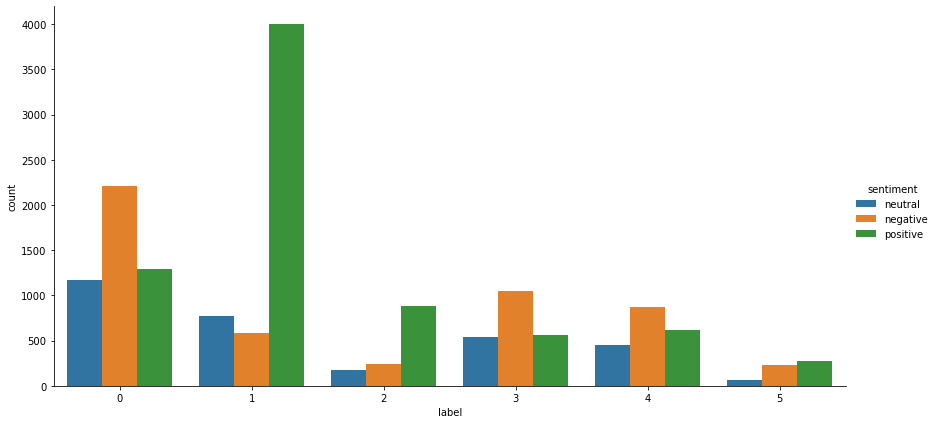

In [375]:
# for colourful plot we can use seaborn catplot
sb.catplot(x='label',hue='sentiment',kind='count',data=df1,height=6,aspect=2)

In [376]:
df_test['sentiment'] = df_test['text'].apply(get_sentiments)   
df_test.head()

,text,label,sentiment
0,im feeling rather rotten so im not very ambiti...,0,positive
1,im updating my blog because i feel shitty,0,neutral
2,i never make her separate from me because i do...,0,neutral
3,i left with my bouquet of red and yellow tulip...,1,positive
4,i was feeling a little vain when i did this one,0,negative


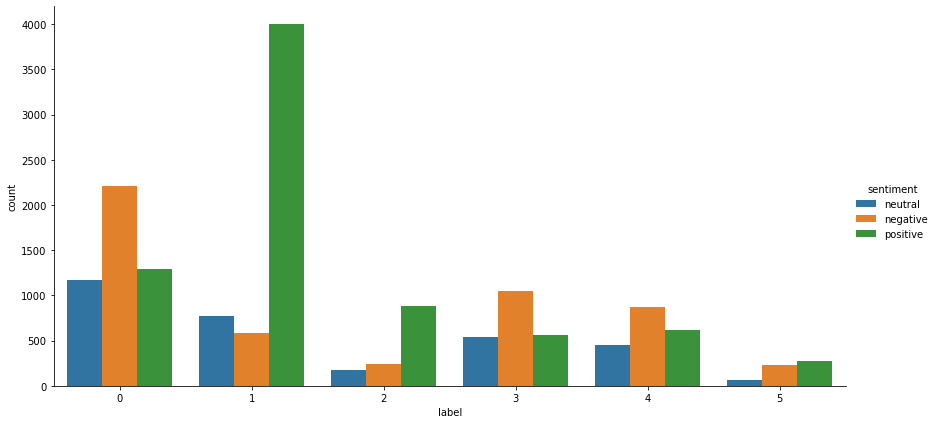

In [377]:
sb.catplot(x='label',hue='sentiment',kind='count',data=df1,height=6,aspect=2)

In [378]:
df_validation['sentiment'] = df_validation['text'].apply(get_sentiments)
df_validation.shape

(2000, 3)

# text cleaning 
    - emojis
    - stopwords
    - special char
    - punctuation

In [379]:
def Text_Cleaning(df) :
    df['clean_text'] = df['text'].apply(ntf.remove_emojis)
    df['clean_text'] = df['clean_text'].apply(ntf.remove_punctuations)
    df['clean_text'] = df['clean_text'].apply(ntf.remove_stopwords)
    df['clean_text'] = df['clean_text'].apply(ntf.remove_special_characters)
    df['clean_text'] = df['clean_text'].apply(ntf.remove_userhandles)

In [380]:
Text_Cleaning(df1)
Text_Cleaning(df_test)
Text_Cleaning(df_validation)

In [381]:
df1.head()

,text,label,sentiment,clean_text
0,i didnt feel humiliated,0,neutral,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,neutral,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,3,negative,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,negative,feeling nostalgic fireplace know property
4,i am feeling grouchy,3,neutral,feeling grouchy


In [382]:
df1[ ~ (df1.clean_text == df1.text) ].shape 
# so this cleaning step is mandatory for classification and anyways we don't use emoji's userhandles and stopwords for training model

(15951, 4)

In [383]:
df_test[ ~ ( df_test.clean_text == df_test.text )].shape

(1994, 4)

In [384]:
df_validation[ ~ ( df_validation.clean_text == df_validation.text )].shape

(1994, 4)

In [385]:
# now we cleared some text line so there might be some value becomes null
df1.isna().sum()

text          0
label         0
sentiment     0
clean_text    0
dtype: int64

In [386]:
df_test.isna().sum()

text          0
label         0
sentiment     0
clean_text    0
dtype: int64

In [387]:
df_validation.isna().sum()

text          0
label         0
sentiment     0
clean_text    0
dtype: int64

In [388]:
from collections import Counter
# Here Counter is basically freq calculator
# https://www.journaldev.com/20806/python-counter-python-collections-counter#:~:text=and%20their%20count.-,Python%20Counter,on%20it's%20keys%20and%20values.

In [389]:
def Extract_KeyWord_temp(text : str, num = 50) :
    tokens = [ token for token in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [390]:
joy_list = df1[df1['label'] == 1]['clean_text'].tolist()

In [391]:
joy_text_string = " ".join(joy_list)
len(joy_text_string)

302838

In [392]:
emotion_classes_str["joy"]

1

In [393]:
def Extract_KeyWord(emotion : str, num : int ) -> dict :
    # let's get's text from DataFrame
    Text_List = df1[df1.label == emotion_classes_str[emotion]]['clean_text'].tolist()
    Text_str = " ".join(Text_List)
    
    words = [ word for word in Text_str.split() ]
    most_comman_words = Counter(words).most_common(num)
    
    return dict(most_comman_words)

In [394]:
keywords = {
    0 : Extract_KeyWord(emotion="sadness",num=50),
    1 : Extract_KeyWord(emotion="joy",num=50),
    2 : Extract_KeyWord(emotion="love",num=50),
    3 : Extract_KeyWord(emotion="anger",num=50),
    4 : Extract_KeyWord(emotion="fear",num=50),
    5 : Extract_KeyWord(emotion="confused",num=50)
}

In [395]:
keywords[5]

{'feel': 356,
 'feeling': 209,
 'im': 91,
 'like': 90,
 'amazed': 67,
 'impressed': 61,
 'overwhelmed': 58,
 'weird': 57,
 'surprised': 55,
 'curious': 54,
 'funny': 49,
 'strange': 45,
 'shocked': 45,
 'little': 44,
 'amazing': 40,
 'time': 36,
 'dazed': 32,
 'bit': 30,
 'people': 29,
 'know': 27,
 'remember': 24,
 'think': 23,
 'life': 22,
 'feels': 22,
 'ive': 20,
 'way': 20,
 'things': 19,
 'stunned': 19,
 'actually': 18,
 'find': 18,
 'pretty': 16,
 'work': 15,
 'love': 15,
 'going': 14,
 'want': 14,
 'feelings': 14,
 'new': 13,
 'makes': 13,
 'didnt': 13,
 'dont': 12,
 'good': 12,
 'day': 12,
 'read': 11,
 'tell': 11,
 'sure': 11,
 'family': 11,
 'got': 11,
 'world': 11,
 'today': 11,
 'started': 10}

# Model Training

In [396]:
# basically this is classification problem so we can use 
# 1 : Naive-Bayes
# 2 : Logistic-Reg
# 3 : KNN
# 4 : Decision Tree

In [397]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [398]:
DF = pd.DataFrame()
DF = pd.concat([df1,df_test,df_validation],axis=0)
DF.shape

(20000, 4)

In [399]:
DF.head(5)

,text,label,sentiment,clean_text
0,i didnt feel humiliated,0,neutral,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,neutral,feeling hopeless damned hopeful cares awake
2,im grabbing a minute to post i feel greedy wrong,3,negative,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,negative,feeling nostalgic fireplace know property
4,i am feeling grouchy,3,neutral,feeling grouchy


In [400]:
Xfeatures = DF['clean_text']
Y = DF['label']

In [401]:
Xfeatures.head()

0                          didnt feel humiliated
1    feeling hopeless damned hopeful cares awake
2      im grabbing minute post feel greedy wrong
3      feeling nostalgic fireplace know property
4                                feeling grouchy
Name: clean_text, dtype: object

In [402]:
Y = Y.apply(lambda x : emotion_classes[x])

In [403]:
Y

0       sadness
1       sadness
2         anger
3          love
4         anger
         ...   
1995    sadness
1996        joy
1997        joy
1998        joy
1999        joy
Name: label, Length: 20000, dtype: object

In [404]:
cv = CountVectorizer(min_df=3)
X = cv.fit_transform(Xfeatures)

In [405]:
type(X)

scipy.sparse.csr.csr_matrix

In [406]:
cv.get_feature_names()[:10] 
# this method is useful to see our feature word from our training data if we use min_df = 1 while creating object of
# CountVectorizer than it will also include noicy words but for removing it we can set min_df > 1 .

# Article : https://stackoverflow.com/questions/47419633/countvectorizer-method-get-feature-names-produces-codes-but-not-words

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abc',
 'abdomen',
 'abide',
 'abilities',
 'ability']

In [407]:
X.toarray().shape

(20000, 5568)

In [408]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=50)

In [409]:
X_train.shape

(16000, 5568)

In [410]:
y_test.shape

(4000,)

#### Model 1 : Naive Bayes

In [411]:
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)

MultinomialNB()

In [412]:
NB_model.score(X_test,y_test)

0.83775

In [413]:
NB_model.predict(X_test)

array(['joy', 'sadness', 'joy', ..., 'anger', 'fear', 'sadness'],
      dtype='<U8')

In [414]:
Text = ["ohh!","That's Awesome","feeling grouchy","didnt feel humiliated"]

In [415]:
NB_model.predict(cv.transform(Text))

array(['joy', 'joy', 'anger', 'sadness'], dtype='<U8')

In [416]:
NB_model.predict_proba(cv.transform(Text))
# this function will return probability of each class -> than we can use np.argmax for index of max_probability

array([[0.13525   , 0.03675   , 0.1188125 , 0.3409375 , 0.081875  ,
        0.286375  ],
       [0.03550763, 0.10342652, 0.10382625, 0.50104389, 0.08838632,
        0.16780938],
       [0.8400661 , 0.01012172, 0.0301182 , 0.06582399, 0.01579346,
        0.03807653],
       [0.01176533, 0.0029294 , 0.00656396, 0.02501324, 0.00458822,
        0.94913985]])

In [417]:
NB_model.classes_

array(['anger', 'confused', 'fear', 'joy', 'love', 'sadness'], dtype='<U8')

In [418]:
# let's make function for single text prediction
def Prediction(Text : str, model) :
    vec_text = cv.transform([Text]).toarray()
    prediction = model.predict(vec_text)
    prediction_prob = model.predict_proba(vec_text)
    pred_prob_for_all = dict(zip(model.classes_,prediction_prob[0]))
    
    params = {
        'prediction' : prediction[0],
        'prediction_prob' : prediction_prob[0],
        'pred_prob_for_all' : pred_prob_for_all
    }
    
    return params

In [419]:
Prediction(Text="He hates running all day",model=NB_model) 
# yes it's not preety good but it's fine as we traning very less number of classes

{'prediction': 'sadness',
 'prediction_prob': array([0.07323684, 0.00316261, 0.0775163 , 0.37374004, 0.0706647 ,
        0.40167952]),
 'pred_prob_for_all': {'anger': 0.0732368360410872,
  'confused': 0.003162608156053303,
  'fear': 0.07751629743320415,
  'joy': 0.37374003937320505,
  'love': 0.07066470374908836,
  'sadness': 0.4016795152473611}}

In [420]:
Y_predict = NB_model.predict(X_test)

In [421]:
Y_predict

array(['joy', 'sadness', 'joy', ..., 'anger', 'fear', 'sadness'],
      dtype='<U8')

In [422]:
print(classification_report(y_true=y_test,y_pred=Y_predict))

              precision    recall  f1-score   support

       anger       0.86      0.79      0.82       545
    confused       0.70      0.39      0.50       131
        fear       0.81      0.77      0.79       472
         joy       0.85      0.92      0.88      1306
        love       0.75      0.62      0.68       331
     sadness       0.85      0.91      0.88      1215

    accuracy                           0.84      4000
   macro avg       0.80      0.73      0.76      4000
weighted avg       0.83      0.84      0.83      4000



In [423]:
cm = confusion_matrix(y_test,Y_predict)

In [424]:
emotion_classes

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'confused'}

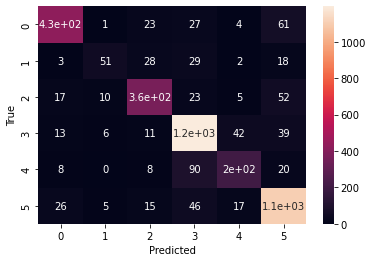

In [425]:
sb.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#### Model 2 : Logistic Regression

In [446]:
LR_model = LogisticRegression(max_iter=200)
LR_model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [447]:
LR_model.score(X_test,y_test)

0.9

In [452]:
Prediction(Text="i am feeling very sad for that",model=LR_model) 

{'prediction': 'sadness',
 'prediction_prob': array([0.06778479, 0.011215  , 0.06478687, 0.1015651 , 0.01793279,
        0.73671545]),
 'pred_prob_for_all': {'anger': 0.06778479334655596,
  'confused': 0.011215003346891309,
  'fear': 0.06478687123215637,
  'joy': 0.10156509578670642,
  'love': 0.01793278752241646,
  'sadness': 0.7367154487652735}}

In [456]:
Prediction(Text="I took all my frustration and anger on you",model=LR_model)
# wrong prediction :-> it should predict Anger

{'prediction': 'joy',
 'prediction_prob': array([0.20864439, 0.01587228, 0.0945775 , 0.47363069, 0.05123261,
        0.15604253]),
 'pred_prob_for_all': {'anger': 0.20864438654982279,
  'confused': 0.0158722811170823,
  'fear': 0.09457750266475459,
  'joy': 0.47363068877503095,
  'love': 0.05123260898118305,
  'sadness': 0.15604253191212636}}

In [457]:
Prediction(Text="I have afraid of that",model = LR_model)

{'prediction': 'fear',
 'prediction_prob': array([0.03537706, 0.00364672, 0.85061982, 0.03646731, 0.01087147,
        0.06301761]),
 'pred_prob_for_all': {'anger': 0.03537706474644064,
  'confused': 0.0036467215919202783,
  'fear': 0.8506198186883367,
  'joy': 0.03646731440417668,
  'love': 0.010871466300872235,
  'sadness': 0.06301761426825347}}

In [458]:
Prediction(Text=" I have afraid of that",model = NB_model)

{'prediction': 'fear',
 'prediction_prob': array([0.04285005, 0.00499254, 0.59306706, 0.1007753 , 0.0355544 ,
        0.22276066]),
 'pred_prob_for_all': {'anger': 0.04285004599568178,
  'confused': 0.004992539109651495,
  'fear': 0.5930670604054035,
  'joy': 0.10077529632836618,
  'love': 0.035554401908733435,
  'sadness': 0.22276065625216404}}